In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numba
import cv2 as cv

In [17]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("/content/bill_authentication.csv")
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [6]:
df.shape

(1372, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df["Class"].value_counts()

0    762
1    610
Name: Class, dtype: int64

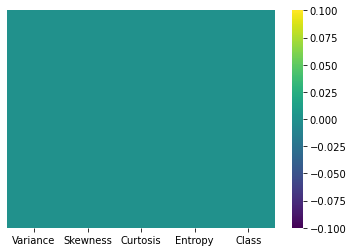

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [12]:
X=df.iloc[:, :4]
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [14]:
Y=df.iloc[:, 4:]
Y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


Split Dataset

In [19]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,
                                                test_size=0.3, random_state=42)

In [21]:
from sklearn.svm import SVC

**Linear**

In [22]:
svclass=SVC(kernel="linear")

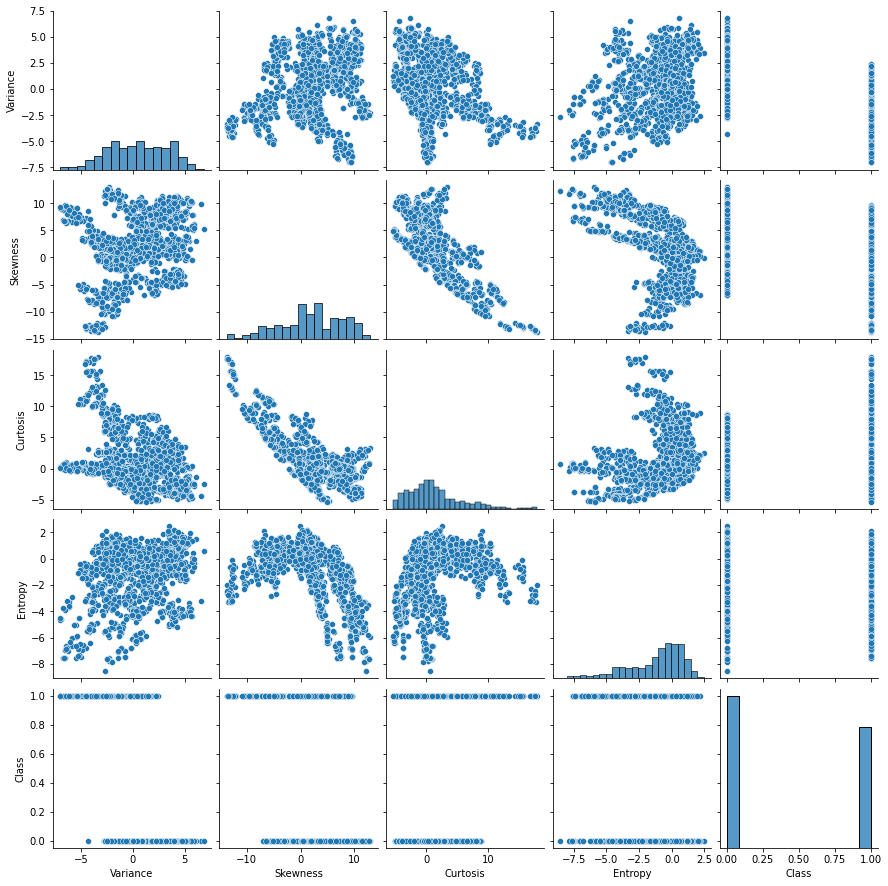

In [23]:
sns.pairplot(df)

In [24]:
svclass.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [25]:
Y_pred=svclass.predict(X_test)

In [26]:
!pip install pyforest

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=92c7813b846c3e0539375c84de0fee4be01a9fa97d6c6b97e781b97e91d85be6
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
con_mat=confusion_matrix(Y_test,Y_pred)
con_mat

array([[226,   3],
       [  2, 181]])

In [29]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



Polynomial

In [32]:
svclass=SVC(kernel="poly",degree=8)
svclass

SVC(degree=8, kernel='poly')

In [33]:
svclass.fit(X_train,Y_train)
Y_pred=svclass.predict(X_test)
con_mat=confusion_matrix(Y_test,Y_pred)
print("confusion matrix",con_mat)
print("Classification report ", classification_report(Y_test,Y_pred))

confusion matrix [[228   1]
 [ 96  87]]
Classification report                precision    recall  f1-score   support

           0       0.70      1.00      0.82       229
           1       0.99      0.48      0.64       183

    accuracy                           0.76       412
   macro avg       0.85      0.74      0.73       412
weighted avg       0.83      0.76      0.74       412



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
